In [542]:
# File: linear_regression_one_varialbe
# Name: pei yin Li
# ----------------------------
# This file shows the fundamental concepts of 
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [543]:
import matplotlib.pyplot as plt
import numpy as np

In [544]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / (2*m)
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# x     : list, containing 21 data points
# y     : list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*(x[i]**3) + theta2*(x[i]**2) + theta3*x[i] + b  - y[i] )**2 for i in range(len(x)) )/ (2*len(x)) 
        

In [545]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


In [546]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum( ( theta1*(x[i]**3) + theta2*(x[i]**2) + theta3*x[i] +b - y[i] )*x[i]**3 for i in range(len(x)) )/len(x)

In [547]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


In [548]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
    return sum( ( theta1*(x[i]**3) + theta2*(x[i]**2) + theta3*x[i] +b - y[i] )*x[i]**2 for i in range(len(x)) )/len(x)

In [549]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


In [550]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
    return sum( ( theta1*(x[i]**3) + theta2*(x[i]**2) + theta3*x[i] +b - y[i] )*x[i] for i in range(len(x)) )/len(x)

In [551]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


In [552]:
def dJ_db(theta1, theta2, theta3, b, x, y):
    return sum( ( theta1*(x[i]**3) + theta2*(x[i]**2) + theta3*x[i] +b - y[i] ) for i in range(len(x)) )/len(x)

In [553]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [554]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [555]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [556]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [557]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

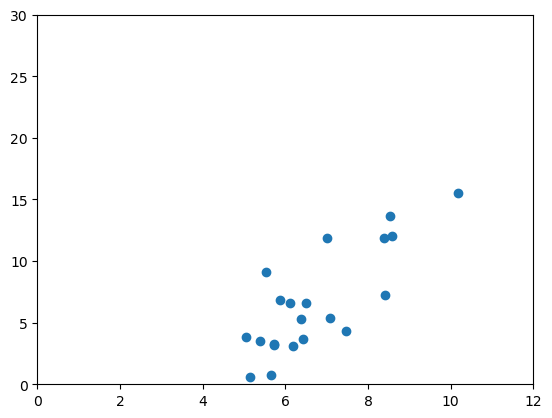

In [558]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [559]:
# Please perform feature scaling (normalization) by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))

x_max = max(x)
x_min = min(x)
x = list( (x[i]-x_min) / (x_max-x_min) for i in range (len(x)) )

y_max = max(y)
y_min = min(y)
y = list( (y[i]-y_min) / (y_max-y_min) for i in range (len(y)) )

In [560]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

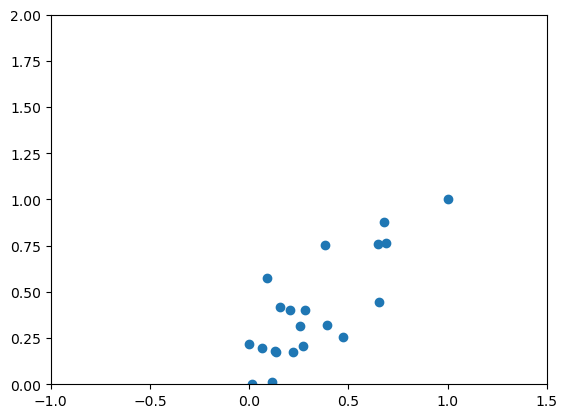

In [561]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [562]:
# ------------ Initialize your theta ------------ #
# -----------  Choose from -1 to +1 ------------ #

In [563]:
theta1 = 1
theta2 = 0.5
theta3 = -0.5
b = 1


In [564]:
# ---------- Initialize your alpha ---------- #

In [565]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [566]:
alpha = 0.1

In [567]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [568]:
# Remember to append updated theta1, theta2, theta3, b, and cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    cost = cost_function(theta1, theta2, theta3 ,b, x_norm  ,y_norm)
    cost_history.append(cost)

    #G.D.
    theta1 = theta1 - alpha * dJ_dtheta1(theta1, theta2, theta3 , b, x_norm , y_norm )
    theta2 = theta2 - alpha * dJ_dtheta2(theta1, theta2, theta3 , b, x_norm , y_norm )  
    theta3 = theta3 - alpha * dJ_dtheta3(theta1, theta2, theta3 , b, x_norm , y_norm )   
    b = b - alpha * dJ_db(theta1, theta2, theta3 , b, x_norm , y_norm )


In [569]:
# ---------- Cost changes during training process ---------- #

In [570]:
# Pay attention to the trend of cost. 
# Is is rising? If it is, why?

print(cost_history)

[0.22876682804957063, 0.18494428417340875, 0.15065641953813502, 0.12382352560221281, 0.10281954558344361, 0.08637313188535765, 0.07349028090457763, 0.06339383992995674, 0.05547620686767358, 0.04926234582287308, 0.04438086892145382, 0.04054142531163523, 0.03751702187265763, 0.03513020010194362, 0.03324222819095487, 0.03174465069556015, 0.030552681610965922, 0.02960003879443656, 0.028834905359970946, 0.02821677222977362, 0.0277139696370875, 0.027301737293929436, 0.026960715714787958, 0.026675766816809648, 0.02643505195715749, 0.02622931123790926, 0.02605130016114506, 0.02589534929698783, 0.025757020118042564, 0.025632836010587974, 0.02552007205230648, 0.02541659072689245, 0.025320713545403255, 0.025231120733049773, 0.02514677285145795, 0.02506684956441548, 0.024990701801181823, 0.02491781438926081, 0.02484777686789866, 0.024780260693407323, 0.024715001438159686, 0.024651784890561784, 0.02459043620208314, 0.024530811414071783, 0.02447279084296926, 0.024416273916568792, 0.02436117514307890

In [571]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: 1, theta2: 0.5, theta3: -0.5, b: 1


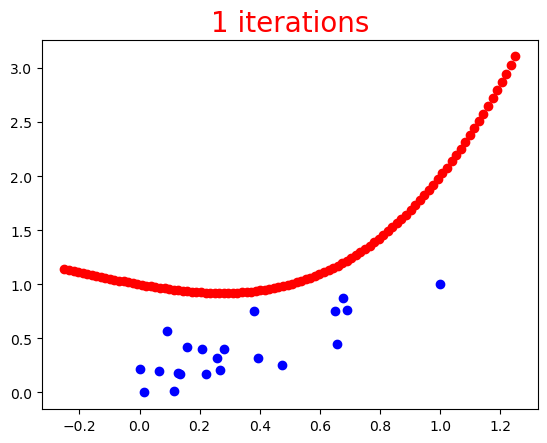

In [572]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.9547503983717491, theta2: 0.4400582999206329, theta3: -0.6056708782590099, b: 0.6294862491797515


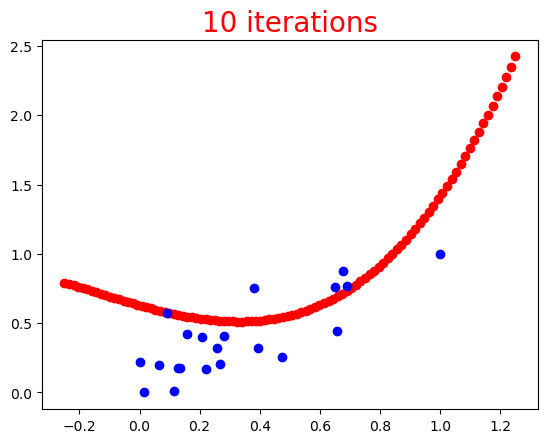

In [573]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.944073869150146, theta2: 0.42946076925147303, theta3: -0.6256110080661831, b: 0.49087767933252063


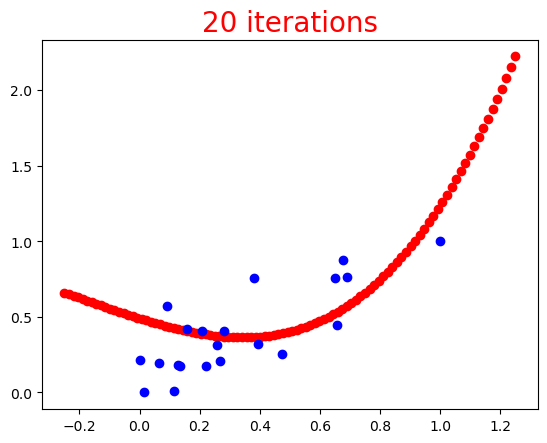

In [574]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [575]:
# ---------- Plot the errors over the training process ---------- #

theta1: 0.9447656633539891, theta2: 0.4354041977495993, theta3: -0.6155011362488694, b: 0.44209910397288005


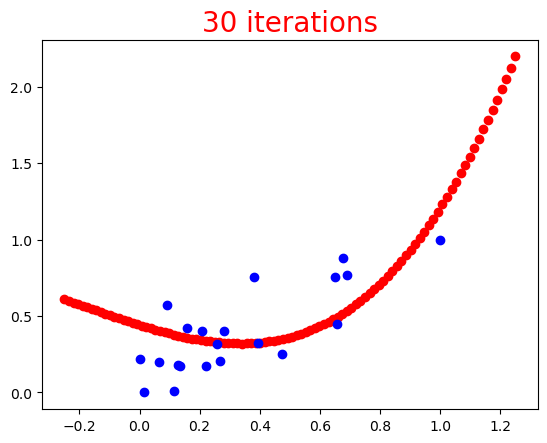

In [576]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.9474717261716263, theta2: 0.44473358608546254, theta3: -0.5980259140948895, b: 0.4205983764582803


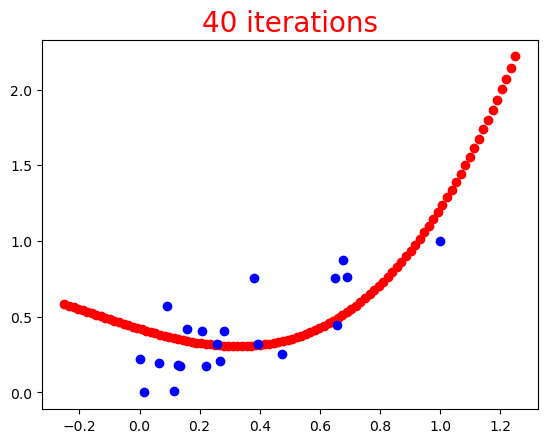

In [577]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

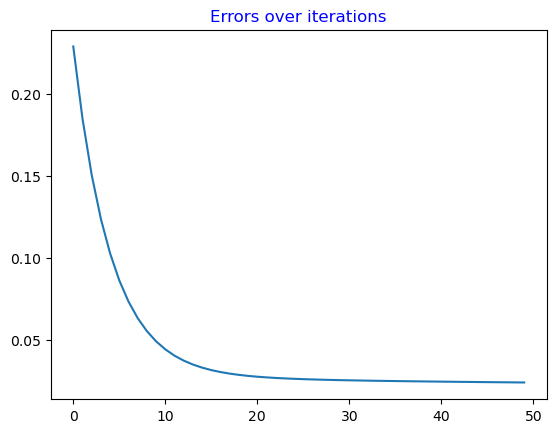

In [578]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')